In [1]:
# USAGE
# python facial_landmarks.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/example_01.jpg 

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2


In [2]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--shape-predictor", required=True,
#	help="path to facial landmark predictor")
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

## サンプルフォルダに移動。
import os
os.chdir("/home/kmori/Face-Detection/facial-landmarks")

## コマンドライン引数の代わりに Dictionary を作成
args={
        "shape_predictor":"shape_predictor_68_face_landmarks.dat", 
        "image":"/home/kmori/opencv/opencv-3.2.0/samples/data/lena.jpg"
     }

In [3]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

In [4]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

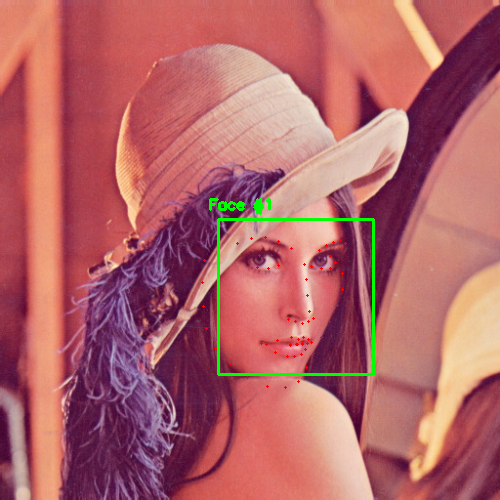

In [5]:
# show the output image with the face detections + facial landmarks
#cv2.imshow("Output", image)
#cv2.waitKey(100)
## インライン表示
from IPython.display import display, Image
display(Image(cv2.imencode('.png', image)[1].tobytes()))